In [38]:
import cv2
from PIL import Image
import numpy as np

In [39]:
def box_filter(img_path, kernel):
    input_img = cv2.imread(img_path)
    input_img = cv2.cvtColor(src=input_img, code=cv2.COLOR_BGR2GRAY)

    kernel_width, kernel_height = kernel.shape
    img_width, img_height = input_img.shape
    
    output_width = img_width - kernel_width + 1
    output_heihht = img_height - kernel_height + 1

    output = np.zeros((output_width, output_heihht))

    for y in range(img_height):
        if y <= img_height - kernel_height:
            for x in range(img_width):
                if x <= img_width - kernel_width:
                    output[x, y] = (kernel * input_img[x: x + kernel_width, y: y + kernel_height]).sum()

    return output


Original image:


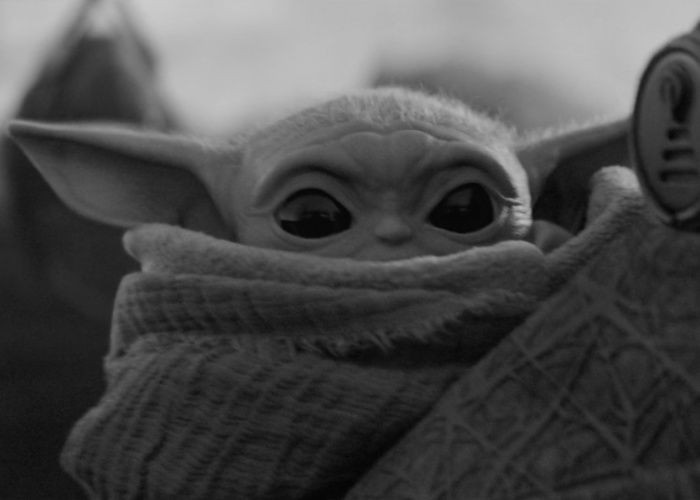


Kernel: 3


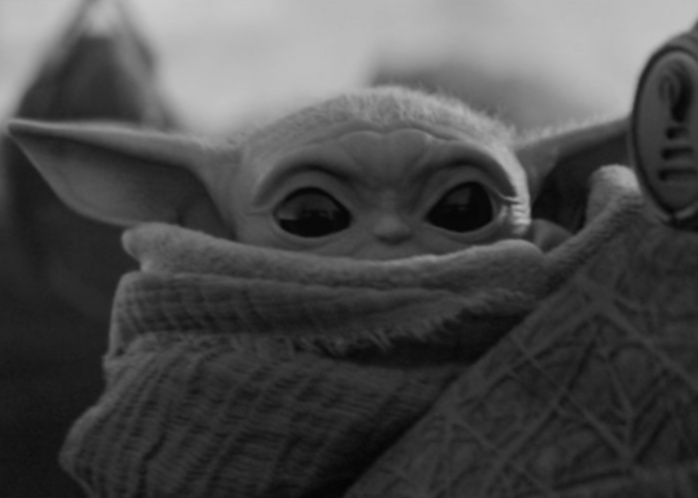


Kernel: 10


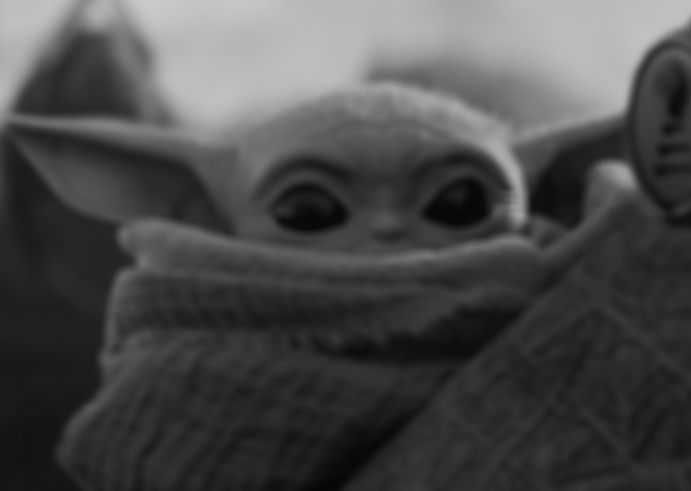


Kernel: 20


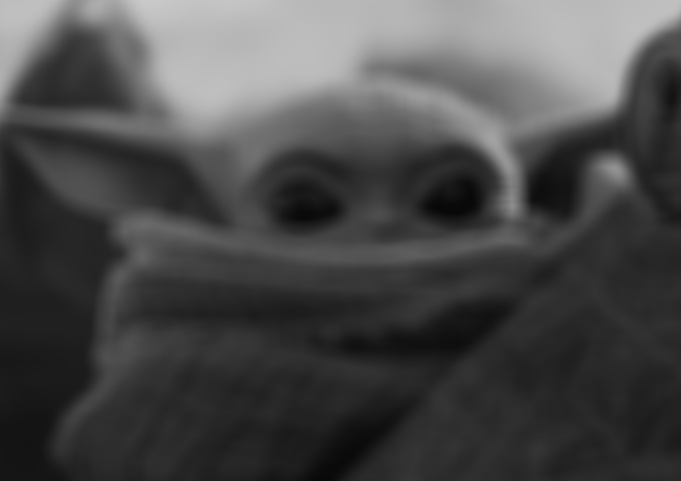




Original image:


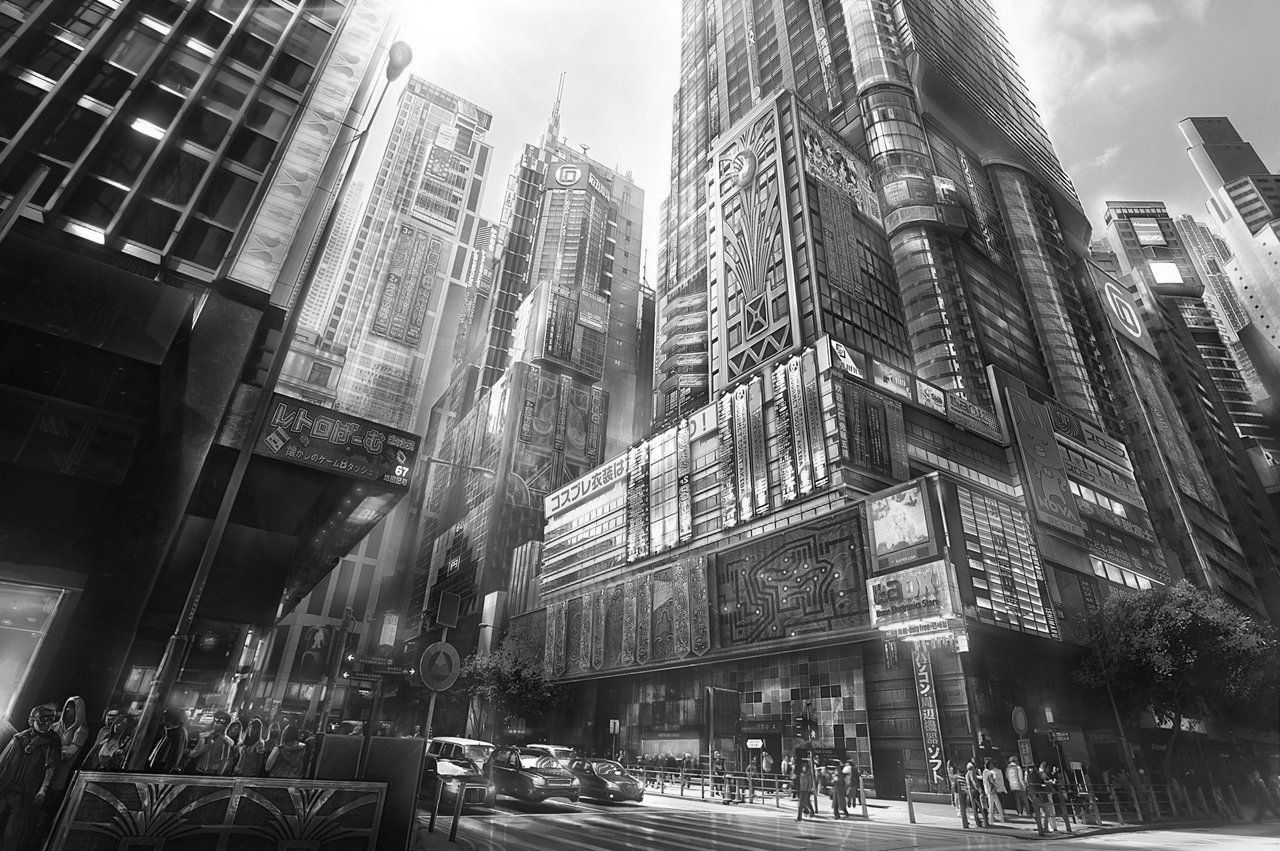


Kernel: 3


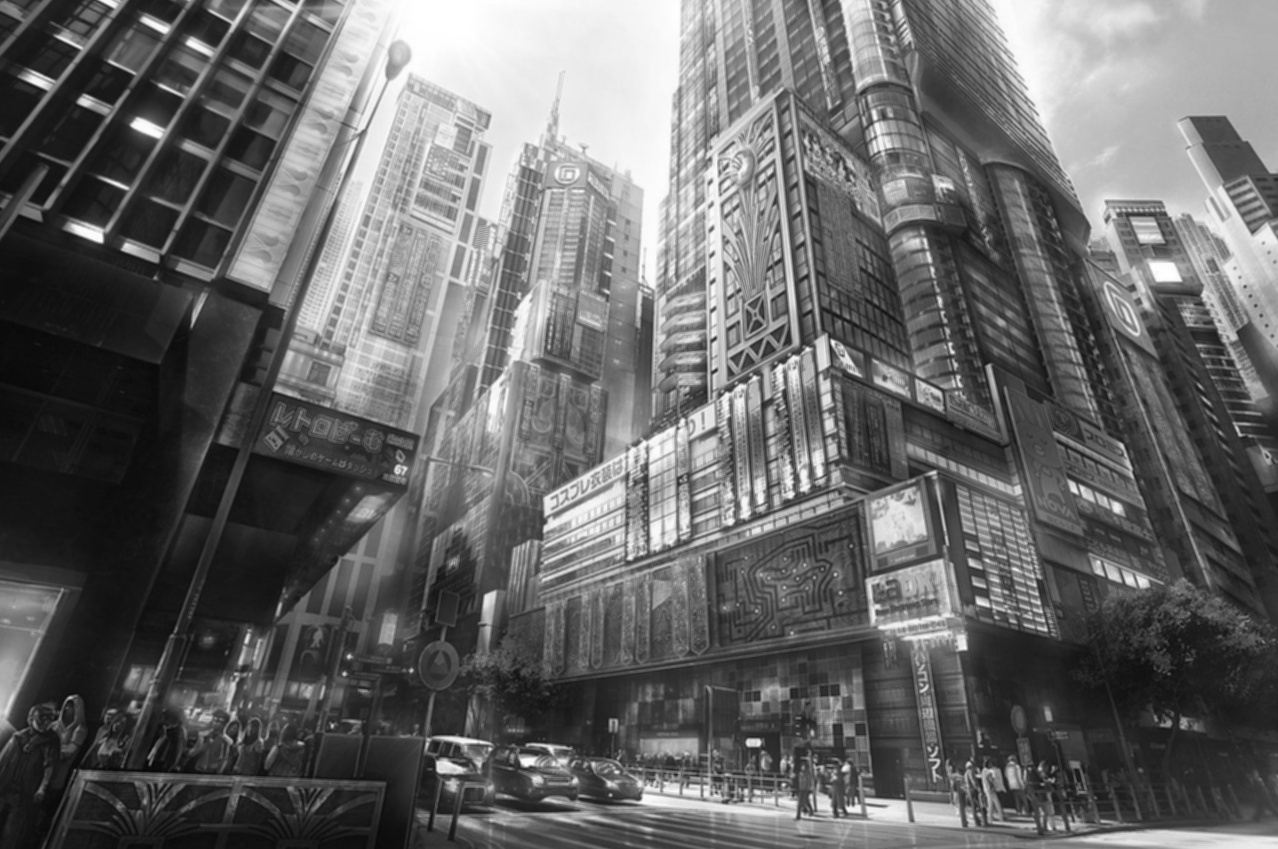


Kernel: 10


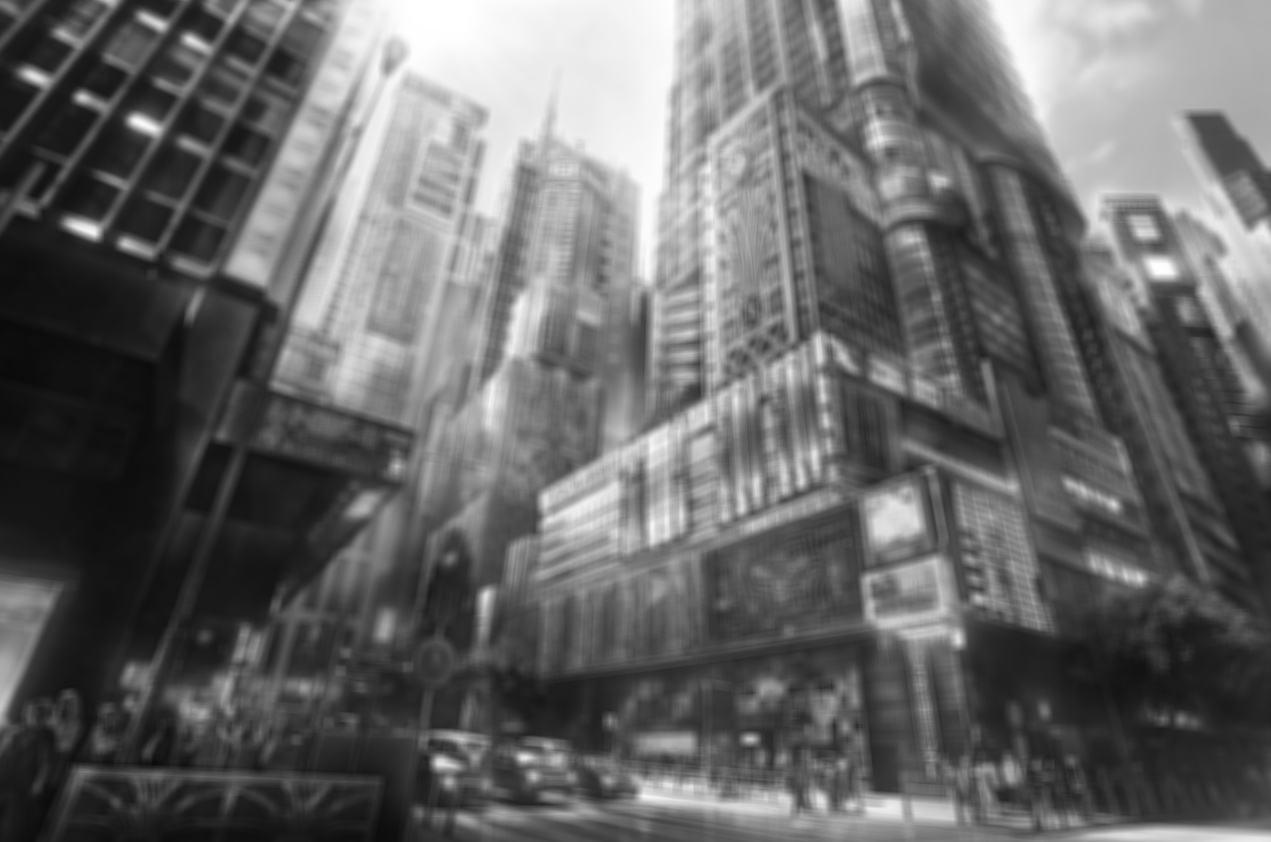


Kernel: 20


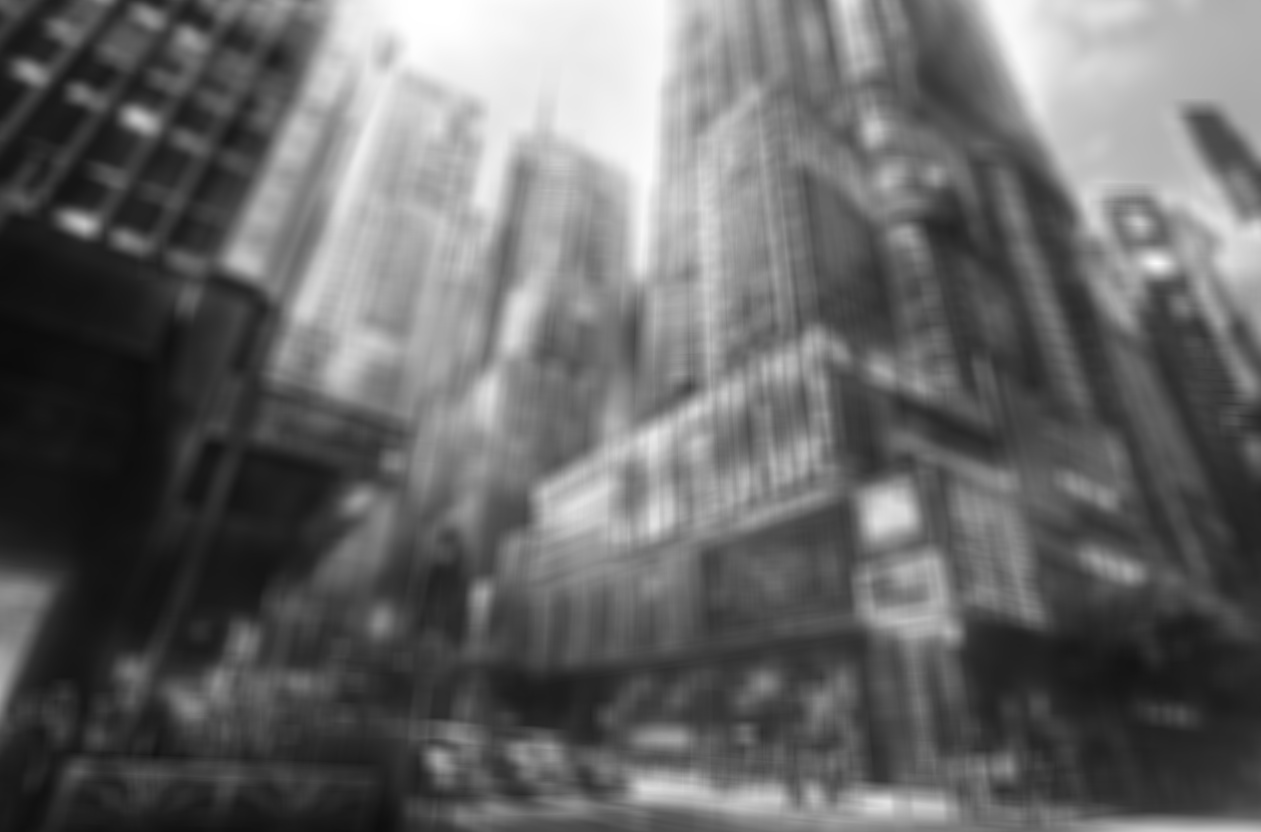

In [40]:

kernels = [
    np.ones((3,3),np.float32) / 3**2,
    np.ones((10,10),np.float32) / 10**2,
    np.ones((20,20),np.float32) / 20**2,
]

for i in range(1, 3):
    print('Original image:')
    display(Image.open(f'images/{i}.jpg').convert('L'))

    for j, kernel in enumerate(kernels):
        print(f'\nKernel: {int(kernel.size**0.5)}')

        output_image = box_filter(f'images/{i}.jpg', kernel)
        cv2.imwrite(f'blurred_images/{i}_{j}_blurred.jpg', output_image)

        display(Image.open(f'blurred_images/{i}_{j}_blurred.jpg'))

    print('\n\n')